In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
import itertools
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import (
    PCA,
    LatentDirichletAllocation
)
from sklearn.feature_extraction.text import (
    TfidfVectorizer, 
    CountVectorizer
)
from sklearn.metrics import silhouette_score
from wordcloud import (
    WordCloud, 
    ImageColorGenerator
)
from PIL import Image
import urllib
import requests
import re
from kneed import KneeLocator
import nltk
from gensim.models.word2vec import Word2Vec
from gensim.models import CoherenceModel


nltk.download('punkt')
nltk.download('stopwords')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import re

In [4]:
path = 'D:\\Thesis Topics\\Topic Modelling\\Data\\'

In [5]:
df = pd.read_csv(path+'tweets.csv')

In [6]:
unique_text = df.tweet.unique()
print(len(unique_text),len(df))

21047 21047


Các dòng tweet không có dòng nào bị trùng lặp nhau

In [7]:
pd.set_option("display.max_colwidth",None)

In [8]:
df.head(10)

username        date                                                                                                                                                                                                                                                                   tweet                                                                                      mentions
0    shivaji_takey  10-06-2020                                                                                                                                                                              Please check what happens to this no 9404177052 not in woking since lockdown. Maharashtra.                                                                                ['vodafonein']
1    sarasberiwala  10-06-2020                                                                                                                                                                         Network fluctuations and 4G Speed is pathetic. Need to Jio as an alternative. Very bad Vodafone                                                                                ['vodafonein']
2       chitreamod  10-06-2020                                                                                                                                                                                                     This has been going on since 3rd... this absolutely unprofessional.                                                                                ['vodafonein']
3     sanjan_suman  10-06-2020         @VodafoneIN  I have done my recharge of 555 on 9709333370 but I haven't got 3gb perday with unlimited call for 84 days. Miss Renu (your employer) told me that "you will get 3gb perday and unlimited call for 84days if you recharge with Â¿555". But I haven'                                                                                ['vodafonein']
4         t_nihsit  10-06-2020                                                                                                                                                                                      But when???Still I am not received any call from customer care.Very poor services.                                                                                ['vodafonein']
5        tanzeelu3  10-06-2020                                                                                                                                                         @VodafoneIN mere area me vodafone ka network nai aa raha hai bhitoli luckow 226021 me plz solves my problem plz                                                                                ['vodafonein']
6       chitreamod  10-06-2020  Thanks, but I have visited the website, called your executive numerous times every time the response is â Sir, sorry for the delay but we have kept your order on priority our executive shall call back ASAP to confirm the appointment with youâ and it goes on.                                                                                ['vodafonein']
7  mayankpatel7293  10-06-2020  @VodafoneIN @VodafoneGroup\nHi,\n Today my Vodafone cim is deactivated without any information.\nI called the customer care and got to know that the portability request came from my end which is totally false. Please support.\n@TRAI\n@TRAI_OHD\n@OfficeOfRSP\n@rs  ['vodafonein', 'vodafonegroup', 'trai', 'trai_ohd', 'officeofrsp', 'rssharma3', 'dot_india']
8       deeranjith  10-06-2020                                                                                                                                                                               Dear Vodafone, I have already responded to your reply. Waiting to hear back from you now.                                                                                ['vodafonein']
9   govindrathi799  10-06-2020                                                                                          

DATA CLEANING

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)  
    return input_txt

1. Remove any @ mentions

In [10]:
remove_pattern(df['tweet'][444],"@[\w]*")

'Can you share me good plan and can tell me how can i port my network operator'

In [11]:
df['Clean_text'] = df['tweet'].apply(lambda x: remove_pattern(x, "@[\w]*"))
df['Clean_text']

0                                                                                                                                                                                                                       Please check what happens to this no 9404177052 not in woking since lockdown. Maharashtra.
1                                                                                                                                                                                                                  Network fluctuations and 4G Speed is pathetic. Need to Jio as an alternative. Very bad Vodafone
2                                                                                                                                                                                                                                              This has been going on since 3rd... this absolutely unprofessional.
3                                                               I have done my 

In [12]:
####kiem tra xem con text nao chua ky tu @ khong?
df['Clean_text'].str.contains('@').sum()

0

In [13]:
###xoa cac digit number in text
df['Clean_text'] = df['Clean_text'].str.replace('\d+', '',regex=True)

In [14]:
###kiem tra xem con text nao chua so khong?
df['Clean_text'].str.contains('\d+',regex=True).sum()

0

In [15]:
###xoa tat ca cac ky tu so, cac ky tu dac biet ra khoi cau
df['Clean_text'] = df['Clean_text'].str.replace("[^a-zA-Z]", " ",regex=True)
df['Clean_text']

0                                                                                                                                                                                                             Please check what happens to this no  not in woking since lockdown  Maharashtra 
1                                                                                                                                                                                               Network fluctuations and G Speed is pathetic  Need to Jio as an alternative  Very bad Vodafone
2                                                                                                                                                                                                                           This has been going on since rd    this absolutely unprofessional 
3                                                                 I have done my recharge of  on  but I haven t got gb perday with unlimite

In [16]:
###chuyen toan bo ve viet thuong
df["Clean_text"]= df["Clean_text"].str.lower() 
df['Clean_text']

0                                                                                                                                                                                                             please check what happens to this no  not in woking since lockdown  maharashtra 
1                                                                                                                                                                                               network fluctuations and g speed is pathetic  need to jio as an alternative  very bad vodafone
2                                                                                                                                                                                                                           this has been going on since rd    this absolutely unprofessional 
3                                                                 i have done my recharge of  on  but i haven t got gb perday with unlimite

In [17]:
###clean link
import re
# df['Clean_text'] = df['Clean_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['Clean_text'] = df['Clean_text'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])

In [18]:
# df['Clean_text'] = df['Clean_text'].str.replace('http:\/\/.*','',regex=True)
df['Clean_text'].str.contains('http').sum()

1388

In [19]:

df["Clean_text"] = df['Clean_text'].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "",regex=True)
df["Clean_text"] = df['Clean_text'].str.replace(r'https://[^\s<>"]+|www\.[^\s<>"]+', "",regex=True)
df['Clean_text'].str.contains('https://').sum()

0

In [20]:
###xoa di khoang trang
df['Clean_text'] = df['Clean_text']\
.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df.shape

(21047, 5)

In [21]:
tokenized_tweet = df['Clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                                                                                                                        [please, check, what, happens, this, not, woking, since, lockdown, maharashtra]
1                                                                                                                             [network, fluctuations, and, speed, pathetic, need, jio, alternative, very, bad, vodafone]
2                                                                                                                                                      [this, has, been, going, since, this, absolutely, unprofessional]
3    [have, done, recharge, but, haven, got, perday, with, unlimited, call, for, days, miss, renu, your, employer, told, that, you, will, get, perday, and, unlimited, call, for, days, you, recharge, with, but, haven]
4                                                                                                                               [but

In [22]:
df['Clean_text_length'] = df['Clean_text'].apply(len)
df.head()

username        date                                                                                                                                                                                                                                                            tweet        mentions                                                                                                                                                                          Clean_text  Clean_text_length
0  shivaji_takey  10-06-2020                                                                                                                                                                       Please check what happens to this no 9404177052 not in woking since lockdown. Maharashtra.  ['vodafonein']                                                                                                                please check what happens this not woking since lockdown maharashtra                 68
1  sarasberiwala  10-06-2020                                                                                                                                                                  Network fluctuations and 4G Speed is pathetic. Need to Jio as an alternative. Very bad Vodafone  ['vodafonein']                                                                                                      network fluctuations and speed pathetic need jio alternative very bad vodafone                 78
2     chitreamod  10-06-2020                                                                                                                                                                                              This has been going on since 3rd... this absolutely unprofessional.  ['vodafonein']                                                                                                                            this has been going since this absolutely unprofessional                 56
3   sanjan_suman  10-06-2020  @VodafoneIN  I have done my recharge of 555 on 9709333370 but I haven't got 3gb perday with unlimited call for 84 days. Miss Renu (your employer) told me that "you will get 3gb perday and unlimited call for 84days if you recharge with Â¿555". But I haven'  ['vodafonein']  have done recharge but haven got perday with unlimited call for days miss renu your employer told that you will get perday and unlimited call for days you recharge with but haven                178
4       t_nihsit  10-06-2020                                                                                                                                                                               But when???Still I am not received any call from customer care.Very poor services.  ['vodafonein']                                                                                                          but when still not received any call from customer care very poor services                 74

In [23]:
df[df['Clean_text_length']==0]

username        date                                                                                                                                                                                                                                                            tweet                                                                                                                                                                                                                                                                                                                                                                                                                                               mentions Clean_text  Clean_text_length
20           omanmessi  10-06-2020                                                                                                                                                                                                                                                      @VodafoneIN                                                                                                                                                                                                                                                                                                                                                                                                                          ['ooredoooman', 'vodafonein']                             0
22     vikashs71253800  10-06-2020                                                                                                                                                                                                                                                       9955847531                                                                                                                                                                                                                                                                                                                                                                                                                                         ['vodafonein']                             0
90     sunilnandaniya1  10-06-2020                                                                                                                                                                                             @TRAI\n@DoT_India\n@VodafoneIN\n@Idea\n@VodafoneIN\n@vodafoneservice                                                                                                                                                                                                                                                                                                                                                                                         ['trai', 'dot_india', 'vodafonein', 'idea', 'vodafoneservice']                             0
124    khalida90500219  10-06-2020  @VodafoneIN à¤¸à¤°,,2 à¤¦à¤¿à¤¨ à¤¹à¥à¤à¤¯à¥,,à¤®à¥à¤à¤¨à¥ à¤¡à¤¿à¤à¥à¤²à¥à¤¸ DM à¤à¤°à¥ à¤¹à¥ à¤à¤ªà¤à¥,,à¤à¤ªà¤¨à¥ à¤à¥à¤ à¤°à¤¿à¤ªà¥à¤²à¤¾à¤ à¤¯à¤¾ à¤°à¥à¤¸à¥à¤ªà¥à¤¨à¥à¤¸ à¤¨à¤¹à¥ à¤¦à¤¿à¤¯à¤¾,,,à¤®à¥à¤¨à¥ à¤ªà¤¿à¤à¤²à¤¾                                                                                                                                                                                                                                                                                                                                                                                                                                          ['vodafonein']                             0
137        just0sand1s  10-06-2020                                                                                                                                                                               

## Looks like these are tweets with different languages or just hastags.
# We can simply drop these tweets

In [24]:
df = df[df['Clean_text_length']>0]

VECTORIZER

[Hi how are you]
[Hi how do you do]

[Hi, how, are, you, do]
[1,1,1,1,0]
[1,1,0,1,2]

TfidfVectorizer:

Convert a collection of raw documents to a matrix of TF-IDF features.
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.


CountVectorizer:

Convert a collection of text documents to a matrix of token counts
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary\
Number of features will be equal to the vocabulary size found by analyzing the data.

In [25]:
vectorizer = TfidfVectorizer
vectorizer = vectorizer(analyzer='word',ngram_range=(1,3),\
                             stop_words='english', min_df = 0.0005, max_df=0.65)
        
tfidf_matrix = vectorizer.fit_transform(df['Clean_text'])

In [26]:
tfidf_matrix

<20215x3587 sparse matrix of type '<class 'numpy.float64'>'
	with 240586 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer='word',ngram_range=(1,1),\
                             stop_words='english', min_df = 0.0001, max_df=0.7)
count_vect.fit(df['Clean_text'])
count_matrix = count_vect.transform(df["Clean_text"])
count_matrix

<20215x4855 sparse matrix of type '<class 'numpy.int64'>'
	with 196441 stored elements in Compressed Sparse Row format>

In [48]:
!pip install threadpoolctl==3.1.0


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0


In [28]:
from sklearn.cluster import KMeans

KMEANS+TFIDF

Text(0, 0.5, 'WCSS')

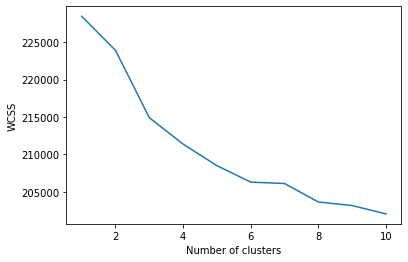

In [36]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 49)
    kmeans.fit(count_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
#     x = range(1,11)
#     kn = KneeLocator(x, wcss, curve='convex', direction='decreasing')
#     kn.plot_knee()
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [37]:
wcss

[228485.3200098937,
 223921.24267732588,
 214906.69281312847,
 211367.3516736664,
 208484.7739132317,
 206283.32676065588,
 206092.62302397643,
 203622.66887805992,
 203143.16891952886,
 202026.01537523948]

In [41]:
wcss2

[19574.105917490564,
 19096.465341523046,
 18926.62347960046,
 18805.174716872178,
 18771.540764250938,
 18530.631170992536,
 18504.089781859908,
 18378.18471856627,
 18374.58393613378,
 18289.0378697149]

Text(0, 0.5, 'WCSS')

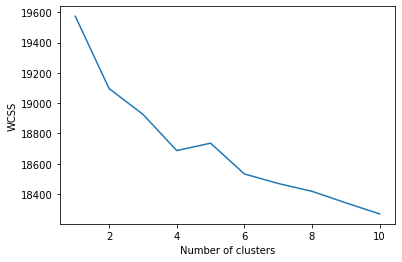

In [44]:
wcss2 =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1149)
    kmeans.fit(tfidf_matrix)
    wcss2.append(kmeans.inertia_)
plt.plot(range(1,11),wcss2)
#     x = range(1,11)
#     kn = KneeLocator(x, wcss, curve='convex', direction='decreasing')
#     kn.plot_knee()
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [71]:
def identify_topics(df, desc_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters, random_state = 49)
    km.fit(desc_matrix)
    clusters = km.labels_.tolist()
    tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
    frame = pd.DataFrame(tweets, index = [clusters])
    print(frame['Cluster'].value_counts()) 
#     for cluster in range(num_clusters):
#         cluster_words = ' '.join(text for text in frame[frame['Cluster'] == cluster]['Tweet'])
#         wordcloud(cluster_words)
    return frame

CLUSTERING 

In [54]:
from sklearn.cluster import KMeans
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt

In [55]:
def wordcloud(cluster):
  # combining the image with the dataset
  Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
  
  # We use the ImageColorGenerator library from Wordcloud 
  # Here we take the color of the image and impose it over our wordcloud
  image_colors = ImageColorGenerator(Mask)

  # Now we use the WordCloud function from the wordcloud library 
  wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(cluster)

  # Size of the image generated 
  plt.figure(figsize=(10,20))
  # Here we recolor the words from the dataset to the image's color
  # recolor just recolors the default colors to the image's blue color
  # interpolation is used to smooth the image generated 
  plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
# plt.axis('off')
  plt.show()

Text(0, 0.5, 'WCSS')

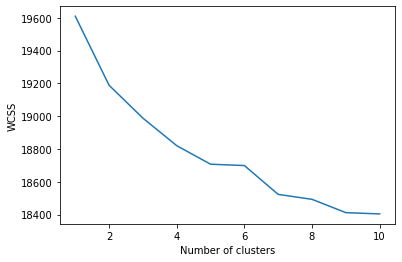

In [22]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 49)
    kmeans.fit(desc_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
#     x = range(1,11)
#     kn = KneeLocator(x, wcss, curve='convex', direction='decreasing')
#     kn.plot_knee()
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [23]:
def identify_topics(df, desc_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters)
    km.fit(desc_matrix)
    clusters = km.labels_.tolist()
    tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
    frame = pd.DataFrame(tweets, index = [clusters])
    print(frame['Cluster'].value_counts()) 
    for cluster in range(num_clusters):
        cluster_words = ' '.join(text for text in frame[frame['Cluster'] == cluster]['Tweet'])
        wordcloud(cluster_words)

2    10769
1     2339
4     2131
3     1765
5     1679
0     1533
Name: Cluster, dtype: int64


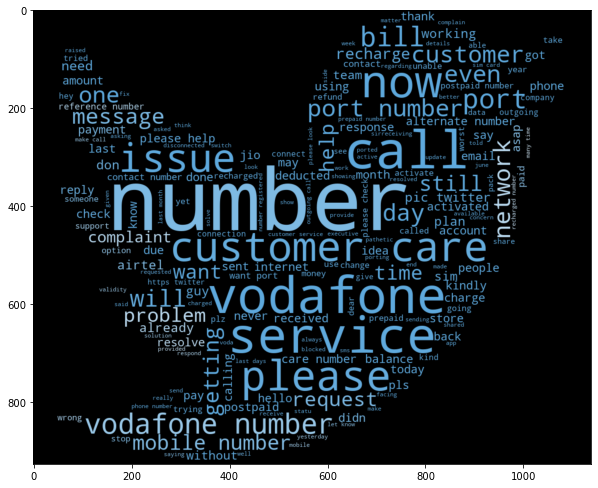

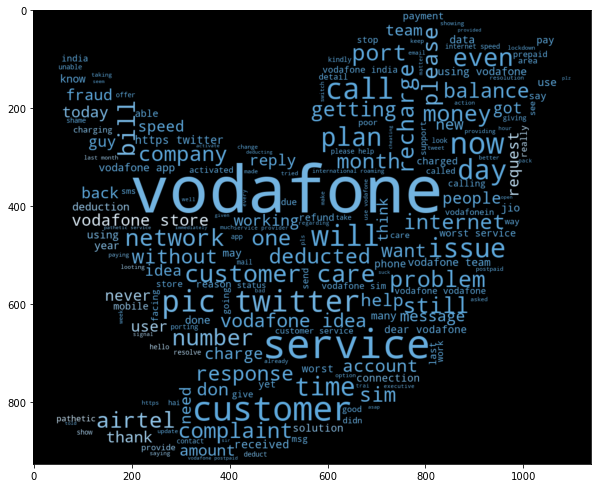

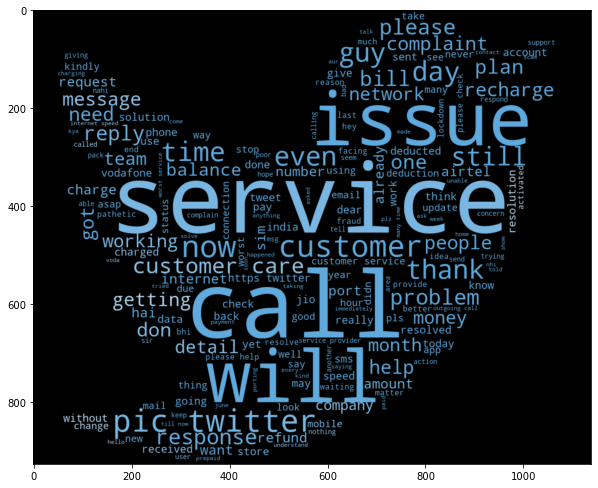

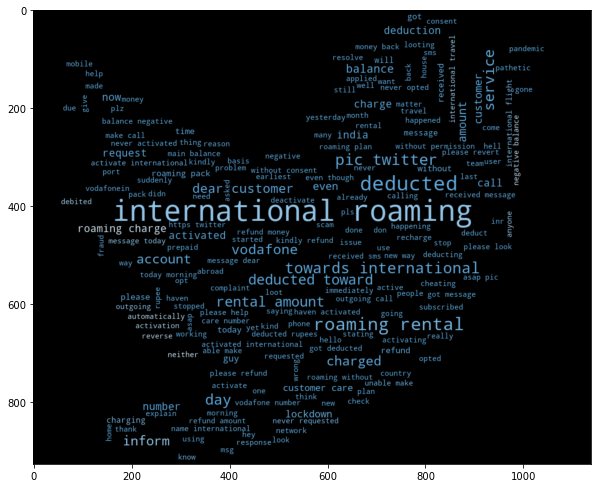

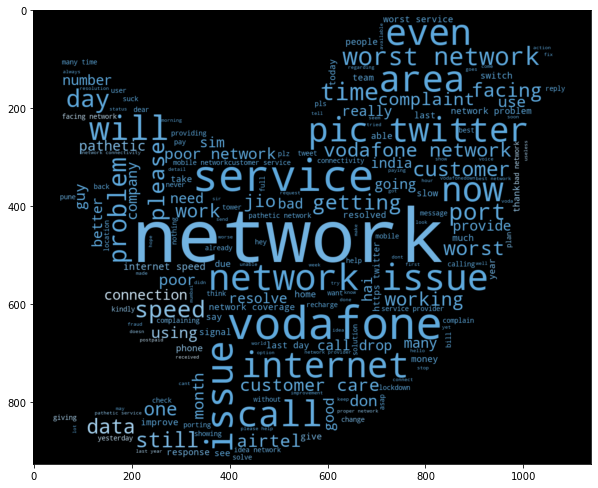

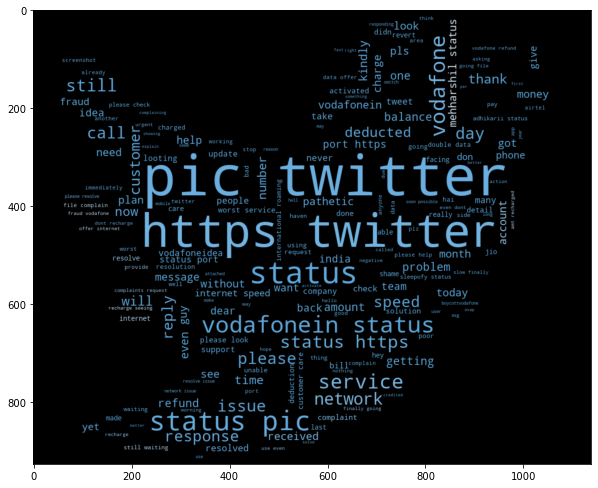

In [24]:
identify_topics(df, desc_matrix, 6)

LDA

In [26]:
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))

In [29]:
from nltk.stem import WordNetLemmatizer  
le=WordNetLemmatizer()
def clean_documents_tokens(text):
    
    if pd.isnull(text):
        return text
    
    text = text.lower()
#     for word in text.split():
#         if word.lower() in contractions:
#             text = text.replace(word, contractions[word.lower()])
            
#     text         = re.sub("[^a-zA-Z#]", ' ', text)
    word_tokens  = nltk.word_tokenize(text)
    tokens       = [le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3] 
    return tokens

In [30]:
# train['clean_tokens'] = train_documents['document'].progress_apply(lambda x: clean_documents_tokens(x))
df['clean_tokens'] = df['Clean_text'].apply(lambda x: clean_documents_tokens(x))

texts = df['clean_tokens']

In [31]:
# Use Gensim's NMF to get the best num of topics via coherence score

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id; using bag_of_word
from gensim.models import TfidfModel
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=4000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]


In [32]:
for doc in corpus:
    print([[dictionary[id], freq] for id, freq in doc])

[['check', 1], ['happens', 1], ['lockdown', 1], ['maharashtra', 1], ['please', 1], ['since', 1]]
[['alternative', 1], ['fluctuation', 1], ['need', 1], ['network', 1], ['pathetic', 1], ['speed', 1], ['vodafone', 1]]
[['since', 1], ['absolutely', 1], ['going', 1], ['unprofessional', 1]]
[['call', 2], ['day', 2], ['done', 1], ['employer', 1], ['miss', 1], ['recharge', 2], ['told', 1], ['unlimited', 2]]
[['call', 1], ['care', 1], ['customer', 1], ['poor', 1], ['received', 1], ['service', 1], ['still', 1]]
[['network', 1], ['vodafone', 1], ['area', 1], ['mere', 1], ['problem', 1], ['raha', 1]]
[['call', 1], ['appointment', 1], ['asap', 1], ['back', 1], ['called', 1], ['confirm', 1], ['delay', 1], ['every', 1], ['executive', 2], ['go', 1], ['kept', 1], ['numerous', 1], ['order', 1], ['priority', 1], ['response', 1], ['shall', 1], ['sorry', 1], ['thanks', 1], ['time', 2], ['visited', 1], ['website', 1]]
[['please', 1], ['vodafone', 1], ['care', 1], ['customer', 1], ['called', 1], ['came', 1],

[['need', 1], ['already', 1], ['find', 1], ['solution', 1], ['move', 1], ['happily', 1]]
[['vodafone', 1], ['number', 1], ['kindly', 1], ['remove', 1], ['callertunes', 1]]
[['http', 1], ['raised', 1], ['consumerhelpline', 1], ['grievance', 1]]
[['network', 2], ['area', 1], ['asap', 1], ['worst', 1], ['tweet', 1], ['fucking', 1], ['hard', 1], ['maintain', 1]]
[['vodafone', 1], ['service', 1], ['india', 1]]
[['care', 1], ['reply', 1]]
[['please', 1], ['detail', 1], ['take', 1], ['send', 1], ['action', 1]]
[['website', 1], ['number', 1], ['given', 1], ['authority', 1], ['reachable', 1], ['bangalore', 1]]
[['lockdown', 1], ['please', 1], ['http', 1], ['status', 1], ['twitter', 1], ['port', 1], ['number', 1], ['guide', 1]]
[['number', 1], ['mobile', 1]]
[['vodafone', 1], ['call', 2], ['request', 1], ['today', 1], ['port', 2], ['number', 1], ['given', 1], ['say', 1], ['failed', 1], ['team', 1], ['seen', 1], ['shame', 1], ['employee', 1], ['activation', 1], ['screenshot', 1], ['stating', 1]]


[['please', 1], ['care', 2], ['customer', 2], ['back', 1], ['compny', 1], ['mail', 1], ['person', 1], ['arrange', 1], ['last', 1], ['like', 1], ['anything', 1], ['ready', 1], ['tell', 1], ['shame', 1], ['responsible', 1], ['whole', 1], ['explain', 1], ['scenario', 1]]
[['vodafone', 2], ['response', 1], ['time', 1], ['know', 1], ['twitter', 1], ['store', 2], ['idea', 1], ['visiting', 1], ['shut', 1], ['merged', 1], ['wasted', 1], ['counter', 1], ['shock', 1]]
[['need', 1], ['vodafone', 2], ['assist', 1], ['access', 1], ['account', 1], ['issue', 1], ['help', 1], ['regard', 1], ['would', 2], ['able', 1], ['resolve', 1], ['however', 1], ['understand', 1], ['india', 1], ['situation', 1], ['international', 1], ['advised', 1]]
[['vodafone', 1], ['work', 1], ['towards', 1], ['unnecessarily', 1], ['charging', 1], ['india', 1]]
[['need', 1], ['back', 1]]
[['right', 1]]
[['service', 1], ['provide', 1], ['class', 1], ['team', 1], ['type', 1]]
[['check', 1], ['call', 1], ['unlimited', 1], ['care', 

[['network', 1], ['kept', 1], ['time', 1], ['postpaid', 1], ['well', 1], ['sent', 1], ['connectivity', 1], ['tried', 1], ['asking', 1], ['prepaid', 1], ['amount', 1], ['email', 1], ['change', 1], ['several', 1], ['earlier', 1], ['outstanding', 1], ['thousand', 1], ['explained', 1]]
[['check', 1], ['please', 1], ['call', 1], ['dear', 1], ['twitter', 1], ['lost', 1], ['balance', 1], ['vodaphone', 1], ['attention', 1], ['became', 1], ['international', 1], ['negative', 1], ['mistake', 1], ['twit', 1]]
[['please', 1], ['port', 1], ['number', 1], ['procedure', 1], ['organization', 1]]
[['twitter', 1], ['think', 1], ['handle', 1], ['dead', 1]]
[]
[['check', 1], ['please', 1], ['network', 1], ['area', 1], ['hell', 1], ['getting', 1], ['signal', 1]]
[['vodafone', 1], ['store', 1], ['band', 1], ['bill', 1], ['idea', 1], ['punjab', 1], ['show', 1], ['room', 1], ['deposit', 1], ['aapke', 1], ['krke', 1], ['ludhiana', 1]]
[['response', 1], ['assist', 1], ['working', 1], ['number', 1], ['everywhere'

[['fluctuation', 1], ['service', 1], ['worst', 1], ['internet', 1], ['frequently', 1]]
[['vodafone', 1], ['service', 1], ['company', 1], ['paisa', 1], ['wala', 1], ['leta', 1], ['dega', 1], ['upar', 1]]
[['fluctuation', 1], ['service', 1], ['worst', 1], ['internet', 1], ['frequently', 1]]
[['response', 1], ['thanks', 1], ['detail', 1], ['sent', 1], ['prompt', 1]]
[['action', 1], ['thankyou', 1]]
[['vodafone', 1], ['service', 1], ['problem', 1], ['response', 1], ['number', 1], ['money', 1], ['balance', 1], ['want', 1], ['making', 1], ['understand', 1], ['email', 1], ['deducting', 1], ['shared', 1], ['intimation', 1], ['faced', 1], ['rocket', 1]]
[['vodafone', 1], ['website', 1], ['http', 1], ['twitter', 1], ['shop', 1], ['expired', 1]]
[['even', 1]]
[['day', 1], ['twitter', 1], ['valid', 1], ['credited', 1], ['grow', 1]]
[['call', 1], ['fool', 1], ['twitter', 1], ['look', 1], ['last', 1], ['broken', 1], ['refund', 1], ['email', 1], ['denied', 1], ['code', 1], ['language', 1], ['fooling'

[['check', 1], ['please', 1], ['plan', 1], ['status', 1], ['twitter', 1], ['charged', 1], ['activated', 1]]
[['please', 1], ['even', 1], ['message', 1], ['else', 1], ['morning', 1], ['rectify', 1], ['attached', 1], ['disappointed', 1], ['following', 1], ['possible', 1], ['india', 1], ['government', 1], ['complain', 1], ['safe', 1], ['earliest', 1], ['seeing', 1], ['guideline', 1], ['trai', 1], ['sound', 1], ['sitting', 1], ['shock', 1]]
[['vodafone', 1], ['service', 1], ['time', 1], ['plan', 1], ['even', 1], ['postpaid', 1], ['store', 2], ['month', 2], ['switch', 1], ['able', 1], ['prepaid', 1], ['paying', 1], ['could', 1], ['team', 1], ['covid', 1], ['visit', 1], ['bangalore', 1], ['nearby', 1], ['easily', 1], ['buying', 1]]
[['need', 1], ['recharge', 2], ['care', 1], ['even', 1], ['till', 1], ['balance', 1], ['failed', 1], ['another', 1], ['activate', 1], ['name', 1], ['cust', 1], ['main', 1], ['recharges', 1], ['date', 1], ['activation', 1], ['justify', 1]]
[['file', 1], ['yesterday

[['call', 1], ['request', 1], ['happening', 1], ['deducted', 1], ['made', 1], ['roaming', 1], ['closed', 1], ['centre', 1], ['international', 2], ['rental', 1], ['flight', 1], ['operation', 1], ['travel', 1], ['functional', 1], ['internationally', 1]]
[['check', 1], ['please', 1], ['already', 1]]
[['vodafone', 1], ['time', 1], ['started', 1], ['company', 1], ['balance', 2], ['shameful', 1], ['case', 1], ['life', 1], ['user', 1], ['survive', 1], ['deduction', 1], ['type', 2], ['height', 1], ['twitt', 1]]
[['please', 1], ['even', 1], ['also', 1], ['number', 1], ['contact', 1], ['mobile', 1], ['complain', 1], ['helpful', 1]]
[['twitter', 1], ['money', 1], ['charge', 1], ['immediately', 1], ['take', 1], ['action', 1], ['refund', 1], ['delhi', 1], ['roaming', 1], ['international', 1], ['legal', 1]]
[['http', 1], ['status', 1], ['twitter', 1], ['vodafonein', 1]]
[['call', 1], ['charge', 1], ['towards', 1], ['deducted', 1], ['made', 1], ['parent', 1], ['roaming', 1], ['international', 1], ['o

[['network', 2], ['vodafone', 1], ['good', 2], ['provide', 1], ['want', 1], ['join', 1], ['tower', 2], ['atleast', 1], ['village', 2], ['location', 1], ['away', 1], ['truly', 1], ['carrier', 1]]
[['recharge', 1], ['twitter', 1], ['charged', 1], ['callertune', 1]]
[['need', 1], ['network', 1], ['pathetic', 1], ['call', 1], ['area', 1], ['internet', 1], ['drop', 2], ['last', 1], ['month', 1], ['find', 1], ['provider', 1], ['shown', 1], ['another', 1], ['city', 2], ['pune', 1], ['vodafonedown', 1], ['enough', 1], ['dead', 1], ['patience', 1], ['connecting', 1], ['core', 1]]
[['network', 1], ['problem', 1], ['even', 1], ['using', 1], ['think', 1], ['tweet', 1], ['solve', 1], ['single', 1]]
[['know', 1], ['hell', 1], ['many', 1], ['good', 1], ['connect', 1], ['make', 1], ['world', 2], ['around', 1], ['life', 1], ['whenever', 1], ['idiot', 1], ['unknown', 1], ['bless', 1]]
[['vodafone', 1], ['call', 1], ['done', 1], ['service', 1], ['every', 1], ['complaining', 1], ['drop', 1], ['good', 1], 

In [33]:
tfidf = TfidfModel(corpus, smartirs='ntc')

# Get the tfidf vector representation of the second sentence
tfidf_corpus = []
for i in range(len(corpus)):
    tfidf_corpus.append(tfidf[corpus[i]])

In [133]:
# import nltk
# import string
# def tokenize(text):
#     stem = nltk.stem.SnowballStemmer('english')
# #     text = text.lower()
#     for token in nltk.word_tokenize(text):
#         if token in string.punctuation: continue
#         yield stem.stem(token)

In [182]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_corpus = [tokenize(doc) for doc in tfidf_text]
# lexicon = gensim.corpora.Dictionary(tfidf_corpus)###dictionary trong truong hop dung tfidf
# tfidf = gensim.models.TfidfModel(dictionary=lexicon, normalize=True)
# vectors = [tfidf[lexicon.doc2bow(doc)] for doc in tfidf_corpus]

In [35]:
import gensim
from gensim import models, corpora
from gensim.models import LsiModel
from gensim import similarities

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.metrics.pairwise import euclidean_distances

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter

In [36]:
# Build LDA +tfidf 
for i in range(1,10,1):
    lda_model_ = gensim.models.LdaMulticore(corpus=tfidf_corpus,
                                       id2word=dictionary,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model_, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(' \nCoherence Score:', coherence_lda)

 
Coherence Score: 0.22084111734858722
 
Coherence Score: 0.3435249917434567
 
Coherence Score: 0.3933457820169634
 
Coherence Score: 0.4125366385511841
 
Coherence Score: 0.40968318261344994
 
Coherence Score: 0.38398331763037463
 
Coherence Score: 0.4473419349686494
 
Coherence Score: 0.39289492537417137
 
Coherence Score: 0.416476697335432


In [37]:
# Build LDA model+bagofword method
for i in range(1,10,1):
    lda_model_ = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model_, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(' \nCoherence Score:', coherence_lda)

 
Coherence Score: 0.27391116878185523
 
Coherence Score: 0.3921206039626707
 
Coherence Score: 0.41557052552348744
 
Coherence Score: 0.42520590703401545
 
Coherence Score: 0.41982042754023485
 
Coherence Score: 0.42849815675070196
 
Coherence Score: 0.46117049408233235
 
Coherence Score: 0.44014981970126427
 
Coherence Score: 0.43086027982955405


In [93]:
import gensim

In [40]:
 best_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=7, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
coherence_model_lda = CoherenceModel(model=best_lda_model, texts=texts, dictionary=dictionary, coherence='c_v')

In [41]:
import pyLDAvis
import pyLDAvis.gensim

In [42]:
print(best_lda_model.print_topics())
# doc_lda = lda_model_[corpus]

[(0, '0.074*"number" + 0.056*"vodafone" + 0.026*"please" + 0.025*"help" + 0.024*"port" + 0.024*"bill" + 0.021*"plan" + 0.014*"store" + 0.014*"postpaid" + 0.014*"want"'), (1, '0.084*"international" + 0.079*"roaming" + 0.055*"deducted" + 0.038*"rental" + 0.034*"balance" + 0.025*"customer" + 0.024*"account" + 0.022*"vodafone" + 0.018*"charge" + 0.017*"without"'), (2, '0.163*"twitter" + 0.072*"http" + 0.067*"amount" + 0.058*"status" + 0.025*"vodafonein" + 0.022*"inform" + 0.019*"charged" + 0.019*"refund" + 0.014*"fraud" + 0.012*"vodafone"'), (3, '0.039*"customer" + 0.027*"service" + 0.018*"vodafone" + 0.017*"even" + 0.016*"people" + 0.016*"airtel" + 0.015*"care" + 0.013*"guy" + 0.012*"money" + 0.011*"time"'), (4, '0.093*"network" + 0.052*"service" + 0.028*"internet" + 0.026*"vodafone" + 0.025*"speed" + 0.024*"worst" + 0.019*"last" + 0.018*"time" + 0.017*"issue" + 0.015*"month"'), (5, '0.045*"issue" + 0.037*"please" + 0.035*"problem" + 0.024*"reply" + 0.023*"still" + 0.022*"response" + 0.02

In [43]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(best_lda_model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.078228 -0.228370       1        1  17.632829
3      0.050314 -0.059359       2        1  17.333036
5      0.104905 -0.000036       3        1  15.267743
1     -0.155694  0.254868       4        1  14.680289
0      0.078249  0.083308       5        1  13.805291
6      0.177410  0.072844       6        1  12.072661
2     -0.333411 -0.123255       7        1   9.208151, topic_info=                 Term         Freq        Total Category  logprob  loglift
85            twitter  4058.000000  4058.000000  Default  30.0000  30.0000
9             network  3458.000000  3458.000000  Default  29.0000  29.0000
981     international  2545.000000  2545.000000  Default  28.0000  28.0000
684           roaming  2397.000000  2397.000000  Default  27.0000  27.0000
16               call  3120.000000  3120.000000  Default  26.0000  26.0000
177            number  2692.000000  2692.000000  Default  25.0000  25.0000
81               http  1364.000000  1364.000000  Default  24.0000  24.0000
337          deducted  1653.000000  1653.000000  Default  23.0000  23.0000
363            amount  1267.000000  1267.000000  Default  22.0000  22.0000
84             status  1105.000000  1105.000000  Default  21.0000  21.0000
124             issue  2022.000000  2022.000000  Default  20.0000  20.0000
1034           rental  1159.000000  1159.000000  Default  19.0000  19.0000
32            problem  1116.000000  1116.000000  Default  18.0000  18.0000
335           balance  1084.000000  1084.000000  Default  17.0000  17.0000
98           internet  1069.000000  1069.000000  Default  16.0000  16.0000
11              speed   913.000000   913.000000  Default  15.0000  15.0000
95              worst   853.000000   853.000000  Default  14.0000  14.0000
68              reply   759.000000   759.000000  Default  13.0000  13.0000
4              please  2676.000000  2676.000000  Default  12.0000  12.0000
108           account   741.000000   741.000000  Default  11.0000  11.0000
0               check   688.000000   688.000000  Default  10.0000  10.0000
244              bill   830.000000   830.000000  Default   9.0000   9.0000
1914         outgoing   562.000000   562.000000  Default   8.0000   8.0000
130              help  1112.000000  1112.000000  Default   7.0000   7.0000
466            refund   772.000000   772.000000  Default   6.0000   6.0000
86         vodafonein   478.000000   478.000000  Default   5.0000   5.0000
101              port  1201.000000  1201.000000  Default   4.0000   4.0000
28            service  4014.000000  4014.000000  Default   3.0000   3.0000
341           resolve   568.000000   568.000000  Default   2.0000   2.0000
12           vodafone  4398.000000  4398.000000  Default   1.0000   1.0000
11              speed   912.359204   913.190448   Topic1  -3.6827   1.7345
95              worst   853.090891   853.931213   Topic1  -3.7498   1.7344
379          provider   326.619124   327.488242   Topic1  -4.7099   1.7328
26               poor   439.672537   441.045939   Topic1  -4.4127   1.7323
225      connectivity   210.848880   211.694522   Topic1  -5.1476   1.7314
347              slow   199.433832   200.264014   Topic1  -5.2032   1.7313
30               area   438.982187   441.064918   Topic1  -4.4142   1.7307
407        experience   150.328542   151.486517   Topic1  -5.4859   1.7277
1742             news    94.611937    95.445085   Topic1  -5.9489   1.7266
516           finally    84.639681    85.471207   Topic1  -6.0603   1.7256
774             worse    74.130992    74.962414   Topic1  -6.1929   1.7243
1404             kbps    72.142908    72.972791   Topic1  -6.2201   1.7240
1510          correct    67.437419    68.270473   Topic1  -6.2875   1.7231
1144             mbps    67.121740    67.951821   Topic1  -6.2922   1.7231
448           package    63.828884    64.664923   Topic1  -6.3425   1.7224
1520        broadband